In [105]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score   






In [106]:
merge_df1=pd.read_csv(r"C:\Guvi project\Final Project\ANN Predictive Modeling of Retail Sales and Markdown Impact\clean_merge_data")

In [107]:
merge_df1

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,DayOfWeek
0,1,1,24924.50,0,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,1,151315,2010,2,5,4
1,1,1,46039.49,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,1,151315,2010,2,6,4
2,1,1,41595.55,0,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,1,151315,2010,2,7,4
3,1,1,19403.54,0,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,1,151315,2010,2,8,4
4,1,1,21827.90,0,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,1,151315,2010,3,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,2,118221,2012,9,39,4
421566,45,98,628.10,0,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,2,118221,2012,10,40,4
421567,45,98,1061.02,0,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,2,118221,2012,10,41,4
421568,45,98,760.01,0,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,2,118221,2012,10,42,4


In [108]:
#prepare for Train the data
x=merge_df1.drop('Weekly_Sales',axis=1).values
y=merge_df1['Weekly_Sales'].values

In [109]:
# #Split the data into train and test 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [110]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x

array([[ 1.,  1.,  0., ...,  2.,  5.,  4.],
       [ 1.,  1.,  1., ...,  2.,  6.,  4.],
       [ 1.,  1.,  0., ...,  2.,  7.,  4.],
       ...,
       [45., 98.,  0., ..., 10., 41.,  4.],
       [45., 98.,  0., ..., 10., 42.,  4.],
       [45., 98.,  0., ..., 10., 43.,  4.]])

Architecture-1

In [111]:
model=Sequential()
model.add(Dense(128,input_shape=(x_train.shape[1],),activation='relu'))  #hidden Layer-1
model.add(Dropout(0.3))
model.add(Dense(100,input_shape=(x_train.shape[1],),activation='relu'))  #hidden Layer-2
model.add(Dropout(0.3))
model.add(Dense(80,input_shape=(x_train.shape[1],),activation='relu'))   #hidden Layer-3
model.add(Dropout(0.3))
model.add(Dense(64,input_shape=(x_train.shape[1],),activation='relu'))   #hidden Layer-4
model.add(Dropout(0.3))
model.add(Dense(32,input_shape=(x_train.shape[1],),activation='relu'))   #hidden Layer-5
model.add(Dropout(0.3))
model.add(Dense(10,input_shape=(x_train.shape[1],),activation='relu'))   #hidden Layer-6
model.add(Dropout(0.3))
model.add(Dense(1))#output Layer


c:\Users\prasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [112]:
model.compile(optimizer=Adam(learning_rate=0.001),loss="MeanSquaredError")


In [113]:
model.summary()


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                │ (None, 128)            │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 100)            │        12,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 80)             │         8,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 64)             │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,017 (121.16 KB)

 Trainable params: 31,017 (121.16 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
#Train the model
result=model.fit(x_train,y_train,epochs=15,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/15
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 55s 5ms/step - loss: 487233568.0000 - val_loss: 393773696.0000
Epoch 2/15
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - loss: 433868320.0000 - val_loss: 392208640.0000
Epoch 3/15
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 83s 4ms/step - loss: 434907232.0000 - val_loss: 388988768.0000
Epoch 4/15
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - loss: 422247136.0000 - val_loss: 375410528.0000
Epoch 5/15
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - loss: 402338880.0000 - val_loss: 344780832.0000
Epoch 6/15
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - loss: 391494304.0000 - val_loss: 321922848.0000
Epoch 7/15
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - loss: 365570880.0000 - val_loss: 299385344.0000
Epoch 8/15
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - loss: 342810112.0000 - val_loss: 297989792.0000
Epoch 9/15
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - loss: 335343072.0000 - val_loss: 279684192.0000
Epoch 10/15
10540/10540 ━━━━━━━━━━━━━

In [115]:
#Evaluate the model
y_pred=model.predict(x_test)

2635/2635 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [116]:
mae=mean_absolute_error(y_test,y_pred)  
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')



MAE: 8654.665630411668
MSE: 237736085.38604844
RMSE: 15418.692726234882
R²: 0.5441048713484675


In [117]:
arch1_df=pd.DataFrame(result.history)
arch1_df



,loss,val_loss
0,456475072.0,393773696.0
1,433050272.0,392208640.0
2,428176192.0,388988768.0
3,419381056.0,375410528.0
4,401641504.0,344780832.0
5,385105088.0,321922848.0
6,362054720.0,299385344.0
7,345769568.0,297989792.0
8,334783744.0,279684192.0
9,323646752.0,259504112.0


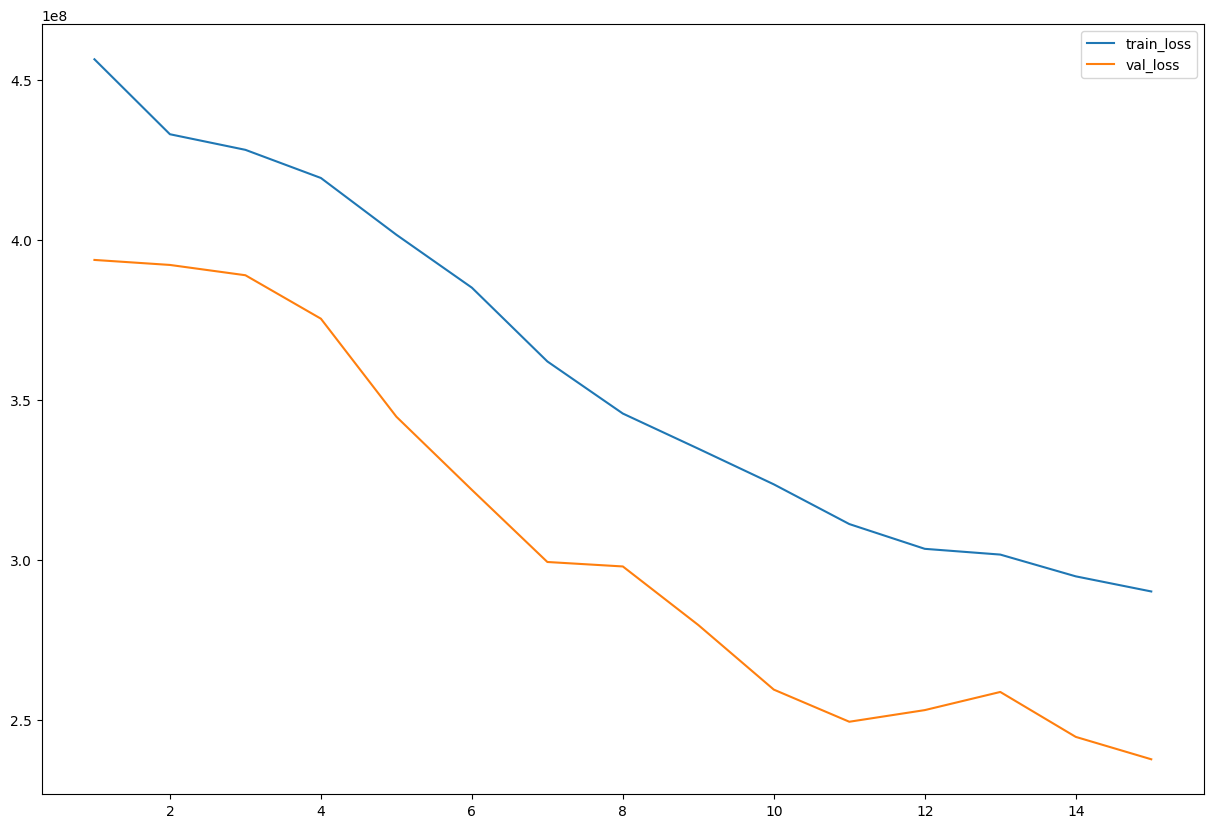

In [118]:
import plotly.express as px
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10),dpi=100)
plt.plot(range(1,16),arch1_df['loss'],label="train_loss")
plt.plot(range(1,16),arch1_df['val_loss'],label="val_loss")
plt.legend()
plt.show()

Architecture -2

In [119]:
model1=Sequential()
model1.add(Dense(128,input_shape=(x_train.shape[1],),activation='relu'))  #hidden Layer-1
model1.add(Dropout(0.2))
model1.add(Dense(256,input_shape=(x_train.shape[1],),activation='relu'))  #hidden Layer-2
model1.add(Dropout(0.2))
model1.add(Dense(128,input_shape=(x_train.shape[1],),activation='relu'))   #hidden Layer-3
model1.add(Dropout(0.2))
model1.add(Dense(64,input_shape=(x_train.shape[1],),activation='relu'))   #hidden Layer-4
model1.add(Dense(1))#output Layer



c:\Users\prasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [120]:
model1.compile(optimizer=Adam(learning_rate=0.001),loss="MeanSquaredError")


In [121]:
model1.summary()


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                │ (None, 128)            │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,673 (299.50 KB)

 Trainable params: 76,673 (299.50 KB)

 Non-trainable params: 0 (0.00 B)

In [122]:
result1=model1.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))


Epoch 1/10
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 65s 5ms/step - loss: 441570304.0000 - val_loss: 383650464.0000
Epoch 2/10
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - loss: 391382912.0000 - val_loss: 373662368.0000
Epoch 3/10
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - loss: 379438432.0000 - val_loss: 342520896.0000
Epoch 4/10
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - loss: 344647040.0000 - val_loss: 307221472.0000
Epoch 5/10
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 83s 4ms/step - loss: 314523648.0000 - val_loss: 282625152.0000
Epoch 6/10
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - loss: 295427232.0000 - val_loss: 278801088.0000
Epoch 7/10
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - loss: 269026176.0000 - val_loss: 267252272.0000
Epoch 8/10
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - loss: 259136784.0000 - val_loss: 238758944.0000
Epoch 9/10
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - loss: 252916048.0000 - val_loss: 223658672.0000
Epoch 10/10
10540/10540 ━━━━━━━━━━━━━

In [123]:
y_pred=model1.predict(x_test)


2635/2635 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [124]:
mae=mean_absolute_error(y_test,y_pred)  
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MAE: 8658.021821193994
MSE: 243556809.0595088
RMSE: 15606.306707850797
R²: 0.5329427477539441


In [125]:
arch2_df=pd.DataFrame(result1.history)
arch2_df

,loss,val_loss
0,409511392.0,383650464.0
1,384697536.0,373662368.0
2,368846464.0,342520896.0
3,338171168.0,307221472.0
4,310015296.0,282625152.0
5,287901088.0,278801088.0
6,267328336.0,267252272.0
7,258077424.0,238758944.0
8,249379536.0,223658672.0
9,243172848.0,243556848.0


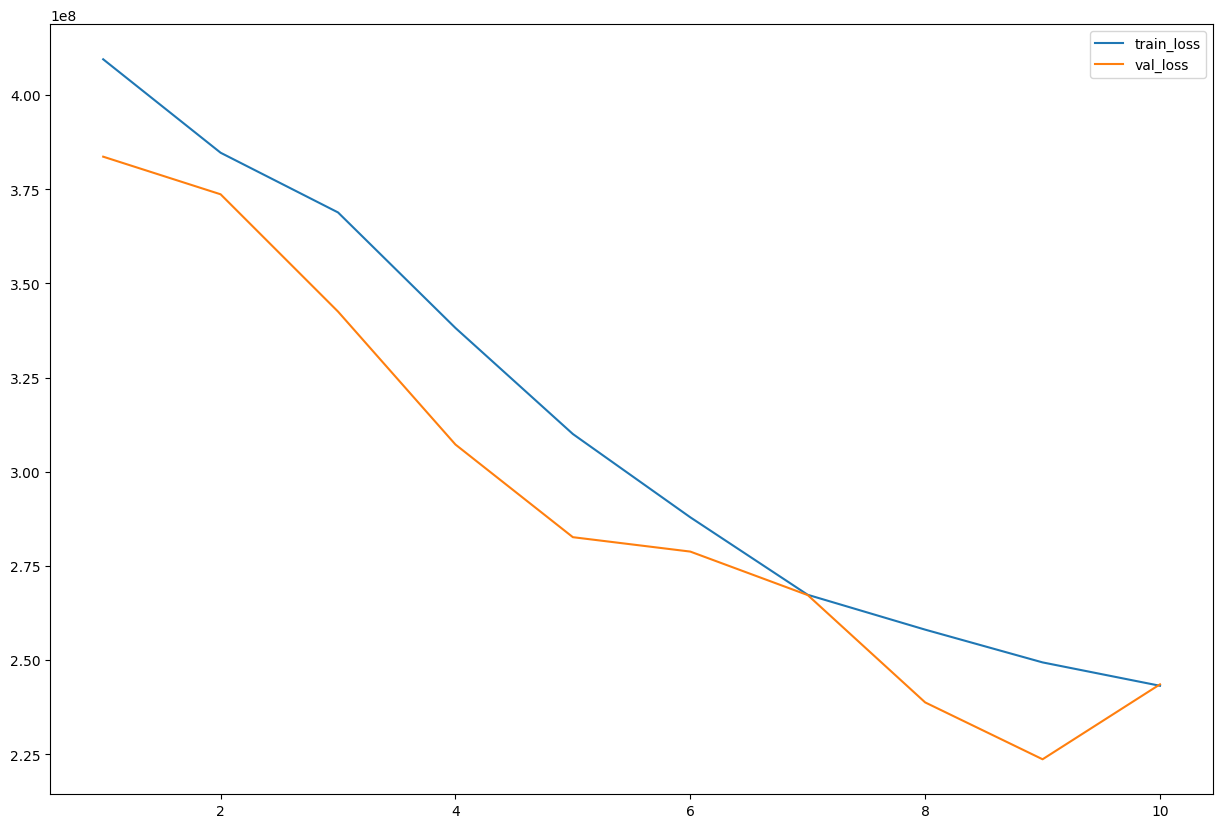

In [127]:
import plotly.express as px
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10),dpi=100)
plt.plot(range(1,11),arch2_df['loss'],label="train_loss")
plt.plot(range(1,11),arch2_df['val_loss'],label="val_loss")
plt.legend()
plt.show()

architecture-3

In [128]:

model2= Sequential()
model2.add(Dense(64, input_shape=(x_train.shape[1],), activation='relu'))  # Hidden Layer-1
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu'))  # Hidden Layer-2
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu'))   # Hidden Layer-3
model2.add(Dropout(0.2))
model2.add(Dense(32, activation='relu'))   # Hidden Layer-4
model2.add(Dense(1))  # Output Layer

# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model2.summary()

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
result2 = model2.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=100, 
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


10540/10540 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - loss: 386750720.0000 - mae: 12255.2910 - val_loss: 381867456.0000 - val_mae: 11938.8438
Epoch 4/100
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 387907296.0000 - mae: 12190.6924 - val_loss: 377867648.0000 - val_mae: 12345.9287
Epoch 5/100
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 381262080.0000 - mae: 12130.5449 - val_loss: 375115296.0000 - val_mae: 11883.3330
Epoch 6/100
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - loss: 381990144.0000 - mae: 12101.5781 - val_loss: 371784416.0000 - val_mae: 11836.7637
Epoch 7/100
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - loss: 378221728.0000 - mae: 12035.7725 - val_loss: 365745440.0000 - val_mae: 11594.5820
Epoch 8/100
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - loss: 367599552.0000 - mae: 11885.4736 - val_loss: 354317664.0000 - val_mae: 11749.7920
Epoch 9/100
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - loss: 368439328.0000 - mae: 11811.0596 - val_loss: 331494592.000

In [129]:
y_pred=model2.predict(x_test)



2635/2635 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


In [130]:
mae=mean_absolute_error(y_test,y_pred)  
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')


MAE: 8223.542272692435
MSE: 205985480.53718933
RMSE: 14352.19427603979
R²: 0.6049914887874206


In [131]:
arch3_df=pd.DataFrame(result2.history)
arch3_df


,loss,mae,val_loss,val_mae
0,422683648.0,13019.971680,395263072.0,11771.194336
1,393227392.0,12275.929688,383394240.0,12062.714844
2,388094464.0,12209.179688,381867456.0,11938.843750
3,385830112.0,12154.299805,377867648.0,12345.928711
4,383429536.0,12105.817383,375115296.0,11883.333008
5,380737056.0,12069.766602,371784416.0,11836.763672
6,377681632.0,12013.919922,365745440.0,11594.582031
7,372674464.0,11940.634766,354317664.0,11749.791992
8,362592800.0,11747.789062,331494592.0,11377.643555
9,347731712.0,11519.323242,316845344.0,10780.498047


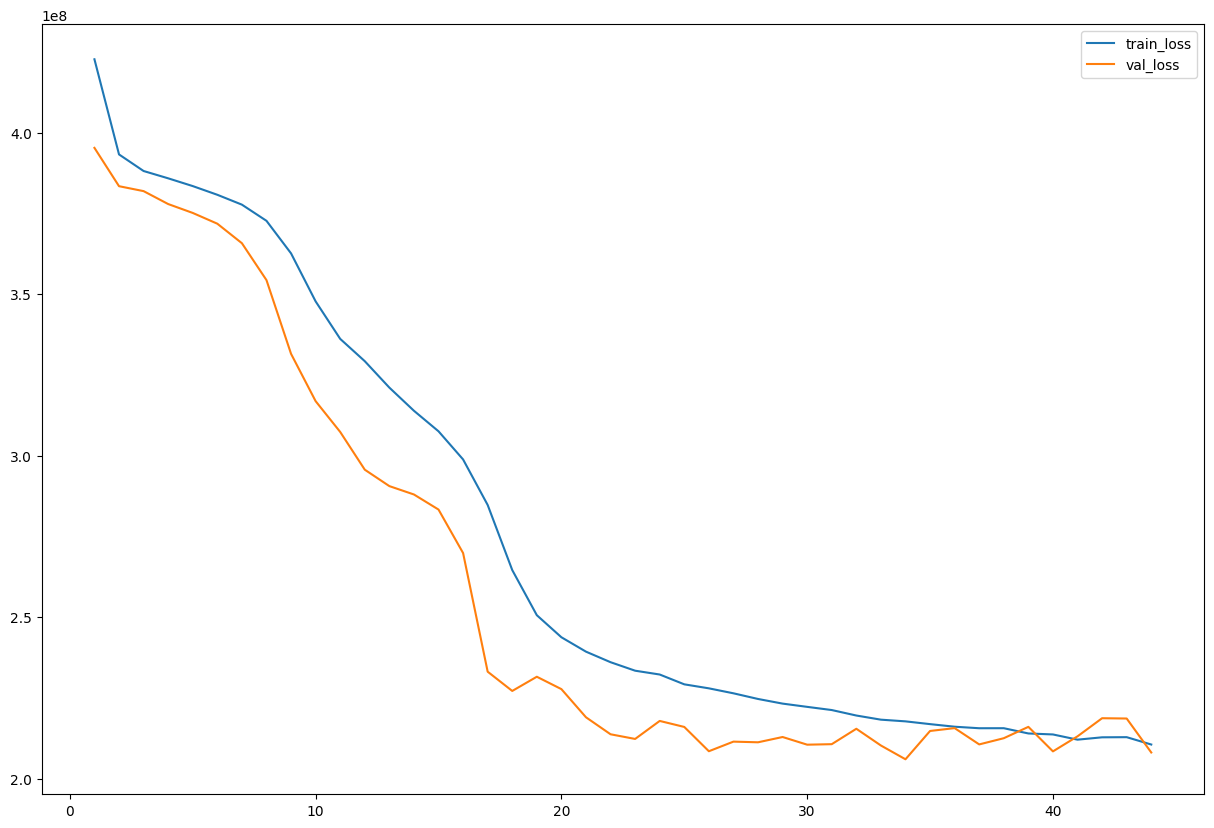

In [132]:
import plotly.express as px
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10),dpi=100)
plt.plot(range(1,45),arch3_df['loss'],label="train_loss")
plt.plot(range(1,45),arch3_df['val_loss'],label="val_loss")
plt.legend()
plt.show()

architecture-4

In [133]:
model3= Sequential()
model3.add(Dense(64, input_shape=(x_train.shape[1],), activation='relu'))  # Hidden Layer-1
model3.add(Dropout(0.2))
model3.add(Dense(128, activation='relu'))  # Hidden Layer-2
model3.add(Dropout(0.2))
model3.add(Dense(64, activation='relu'))   # Hidden Layer-3
model3.add(Dropout(0.2))
model3.add(Dense(32, activation='relu'))   # Hidden Layer-4
model3.add(Dense(1))  # Output Layer

# Comile the model
model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model3.summary()

result3 = model3.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_test, y_test))


c:\Users\prasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,905 (77.75 KB)

 Trainable params: 19,905 (77.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - loss: 458146560.0000 - mae: 13634.1172 - val_loss: 388732704.0000 - val_mae: 12130.8896
Epoch 2/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - loss: 391561312.0000 - mae: 12247.2510 - val_loss: 384638784.0000 - val_mae: 11997.4336
Epoch 3/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 389930720.0000 - mae: 12193.5459 - val_loss: 382211008.0000 - val_mae: 11791.4453
Epoch 4/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 122s 12ms/step - loss: 385986208.0000 - mae: 12165.4736 - val_loss: 377446016.0000 - val_mae: 12200.0176
Epoch 5/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 276s 24ms/step - loss: 378919744.0000 - mae: 12100.4043 - val_loss: 374631136.0000 - val_mae: 11826.6963
Epoch 6/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 60s 6ms/step - loss: 378810464.0000 - mae: 12040.9512 - val_loss: 370177664.0000 - val_mae: 11992.8779
Epoch 7/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 65s 4ms/step - loss: 386363616.0000 - mae: 12046.9697 - val_loss: 3603

In [134]:
y_pred=model3.predict(x_test)


2635/2635 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step


In [136]:
mae=mean_absolute_error(y_test,y_pred)  
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MAE: 8407.56169067351
MSE: 220629239.68181112
RMSE: 14853.593493892686
R²: 0.5769098517555895


In [137]:
arch4_df=pd.DataFrame(result3.history)
arch4_df

,loss,mae,val_loss,val_mae
0,422510400.0,12995.901367,388732704.0,12130.889648
1,392020672.0,12238.401367,384638784.0,11997.433594
2,388104992.0,12182.528320,382211008.0,11791.445312
3,385653536.0,12138.270508,377446016.0,12200.017578
4,383981920.0,12099.611328,374631136.0,11826.696289
5,380963552.0,12059.452148,370177664.0,11992.877930
6,376327520.0,12004.320312,360313184.0,11543.866211
7,365731168.0,11867.458984,333285920.0,11454.007812
8,343985632.0,11498.890625,303676640.0,10606.443359
9,320873728.0,11055.311523,276467264.0,9765.122070


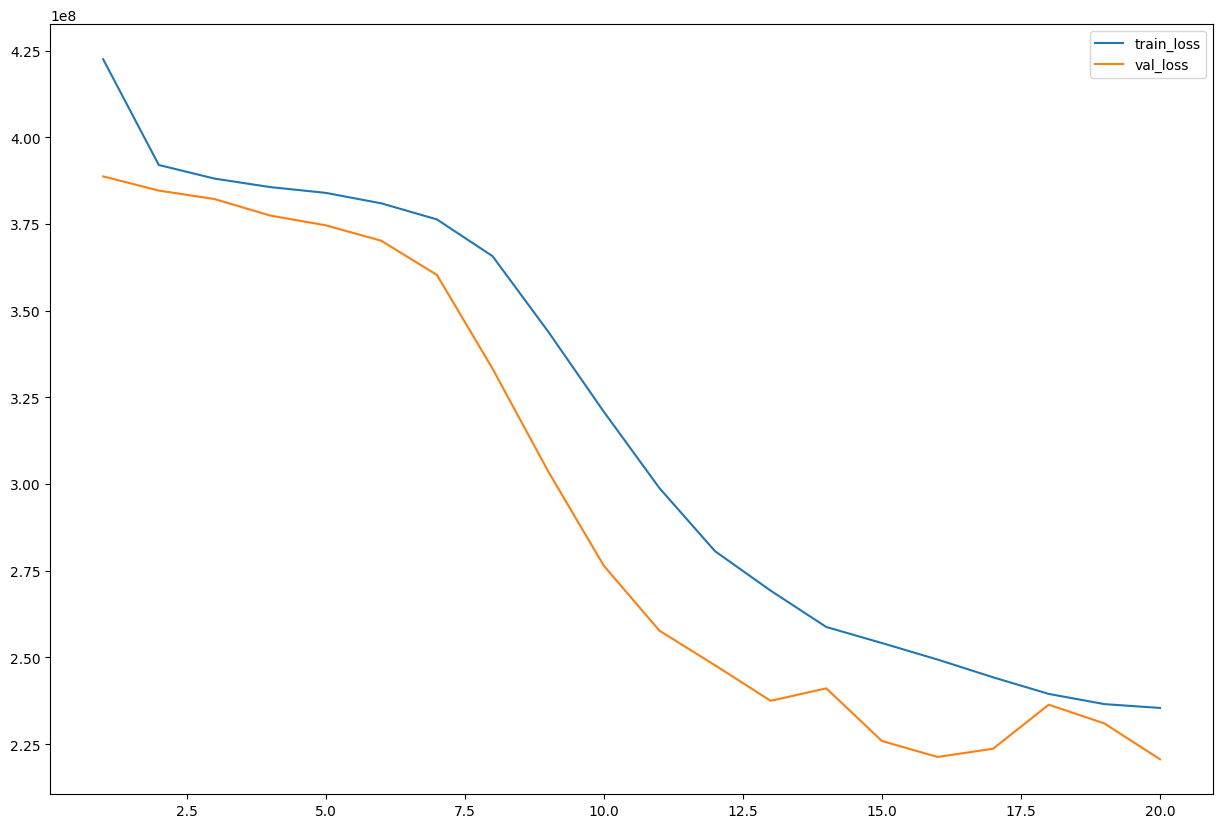

In [138]:
import plotly.express as px
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10),dpi=100)
plt.plot(range(1,21),arch4_df['loss'],label="train_loss")
plt.plot(range(1,21),arch4_df['val_loss'],label="val_loss")
plt.legend()
plt.show()

In [140]:
#save the model
model.save("Final_retail_sales.h5")